Epoch [10/200], Loss: 0.0006
Epoch [20/200], Loss: 0.0003
Epoch [30/200], Loss: 0.0002
Epoch [40/200], Loss: 0.0002
Epoch [50/200], Loss: 0.0002
Epoch [60/200], Loss: 0.0002
Epoch [70/200], Loss: 0.0002
Epoch [80/200], Loss: 0.0003
Epoch [90/200], Loss: 0.0002
Epoch [100/200], Loss: 0.0002
Epoch [110/200], Loss: 0.0001
Epoch [120/200], Loss: 0.0001
Epoch [130/200], Loss: 0.0001
Epoch [140/200], Loss: 0.0001
Epoch [150/200], Loss: 0.0001
Epoch [160/200], Loss: 0.0001
Epoch [170/200], Loss: 0.0001
Epoch [180/200], Loss: 0.0001
Epoch [190/200], Loss: 0.0001
Epoch [200/200], Loss: 0.0001


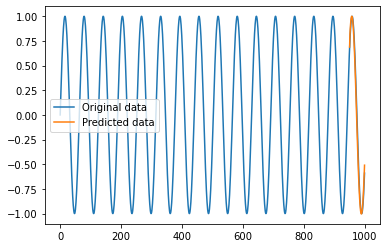

In [2]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# データ生成
def generate_sine_wave(seq_length):
    x = np.arange(seq_length)
    y = np.sin(x / 10)
    return y

# データセットクラス
class SineWaveDataset(torch.utils.data.Dataset):
    def __init__(self, data, seq_length):
        self.data = data
        self.seq_length = seq_length

    def __len__(self):
        return len(self.data) - self.seq_length

    def __getitem__(self, index):
        return (self.data[index:index+self.seq_length], self.data[index+1:index+self.seq_length+1])

# LSTMモデル
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.linear(out)
        return out

# ハイパーパラメータ
input_size = 1
hidden_size = 64
num_layers = 1
output_size = 1
seq_length = 50
num_epochs = 200
learning_rate = 0.01

# データセットとデータローダー
data = generate_sine_wave(1000)
dataset = SineWaveDataset(data, seq_length)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True)

# モデル、損失関数、オプティマイザー
model = LSTMModel(input_size, hidden_size, num_layers, output_size)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# 学習
for epoch in range(num_epochs):
    for inputs, targets in dataloader:
        inputs = inputs.view(-1, seq_length, input_size).float()
        targets = targets.view(-1, seq_length, output_size).float()

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# 推論（未来のデータ予測）
model.eval()
with torch.no_grad():
    test_input = torch.tensor(data[-seq_length:]).float().view(1, seq_length, input_size)
    predicted = model(test_input).view(-1).numpy()

# 結果のプロット
plt.plot(data, label='Original data')
plt.plot(np.arange(len(data)-seq_length, len(data)), predicted, label='Predicted data')
plt.legend()
plt.show()
